In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [2]:
path = r'C:\Users\kuohe\ClimateWins\02 Data'

In [4]:
col_names = ['Id','sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df_iris = pd.read_csv(os.path.join(path, 'iris.csv'), index_col = False, header=None, names=col_names)

In [5]:
df_iris.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa


In [8]:
# Define a dictionary mapping species names to numerical codes
iris_class = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

# Map species names to codes
df_iris['species_code'] = df_iris['species'].map(iris_class)


In [9]:
df_iris

,Id,sepal_length,sepal_width,petal_length,petal_width,species,species_code
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,NaN
1,1,5.1,3.5,1.4,0.2,Iris-setosa,0.0
2,2,4.9,3.0,1.4,0.2,Iris-setosa,0.0
3,3,4.7,3.2,1.3,0.2,Iris-setosa,0.0
4,4,4.6,3.1,1.5,0.2,Iris-setosa,0.0
...,...,...,...,...,...,...,...
146,146,6.7,3.0,5.2,2.3,Iris-virginica,2.0
147,147,6.3,2.5,5.0,1.9,Iris-virginica,2.0
148,148,6.5,3.0,5.2,2.0,Iris-virginica,2.0
149,149,6.2,3.4,5.4,2.3,Iris-virginica,2.0


In [11]:
df_iris = df_iris.drop(index=0).reset_index(drop=True)
df_iris

,Id,sepal_length,sepal_width,petal_length,petal_width,species,species_code
0,2,4.9,3.0,1.4,0.2,Iris-setosa,0.0
1,3,4.7,3.2,1.3,0.2,Iris-setosa,0.0
2,4,4.6,3.1,1.5,0.2,Iris-setosa,0.0
3,5,5.0,3.6,1.4,0.2,Iris-setosa,0.0
4,6,5.4,3.9,1.7,0.4,Iris-setosa,0.0
...,...,...,...,...,...,...,...
144,146,6.7,3.0,5.2,2.3,Iris-virginica,2.0
145,147,6.3,2.5,5.0,1.9,Iris-virginica,2.0
146,148,6.5,3.0,5.2,2.0,Iris-virginica,2.0
147,149,6.2,3.4,5.4,2.3,Iris-virginica,2.0


In [13]:
#subset for plotting the petal data
columns = ['petal_length', 'petal_width', 'species_code']
df2 = df_iris[columns]

In [14]:
df2

,petal_length,petal_width,species_code
0,1.4,0.2,0.0
1,1.3,0.2,0.0
2,1.5,0.2,0.0
3,1.4,0.2,0.0
4,1.7,0.4,0.0
...,...,...,...
144,5.2,2.3,2.0
145,5.0,1.9,2.0
146,5.2,2.0,2.0
147,5.4,2.3,2.0


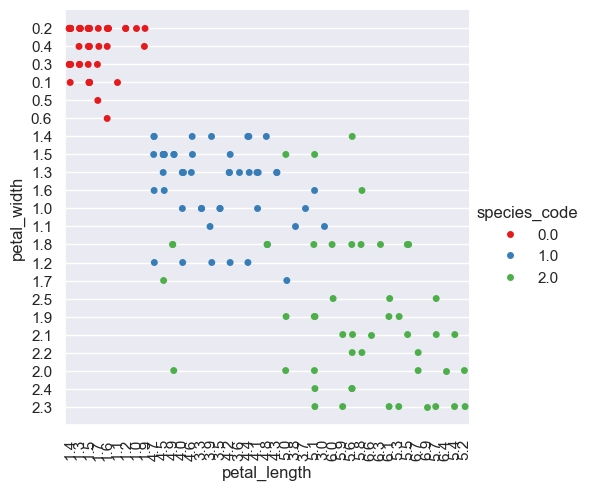

In [15]:
sns.set_theme()
g = sns.catplot(x="petal_length", y="petal_width", hue="species_code", palette='Set1', data=df2)
g.set_xticklabels(rotation=90)

In [18]:
# Convert columns to integer
df_iris['sepal_length'] = pd.to_numeric(df_iris['sepal_length'], errors='coerce').fillna(0).astype('int64')
df_iris['sepal_width'] = pd.to_numeric(df_iris['sepal_width'], errors='coerce').fillna(0).astype('int64')
df_iris['petal_length'] = pd.to_numeric(df_iris['petal_length'], errors='coerce').fillna(0).astype('int64')
df_iris['petal_width'] = pd.to_numeric(df_iris['petal_width'], errors='coerce').fillna(0).astype('int64')

#check the dtypes again
df_iris.dtypes


Id               object
sepal_length      int64
sepal_width       int64
petal_length      int64
petal_width       int64
species          object
species_code    float64
dtype: object

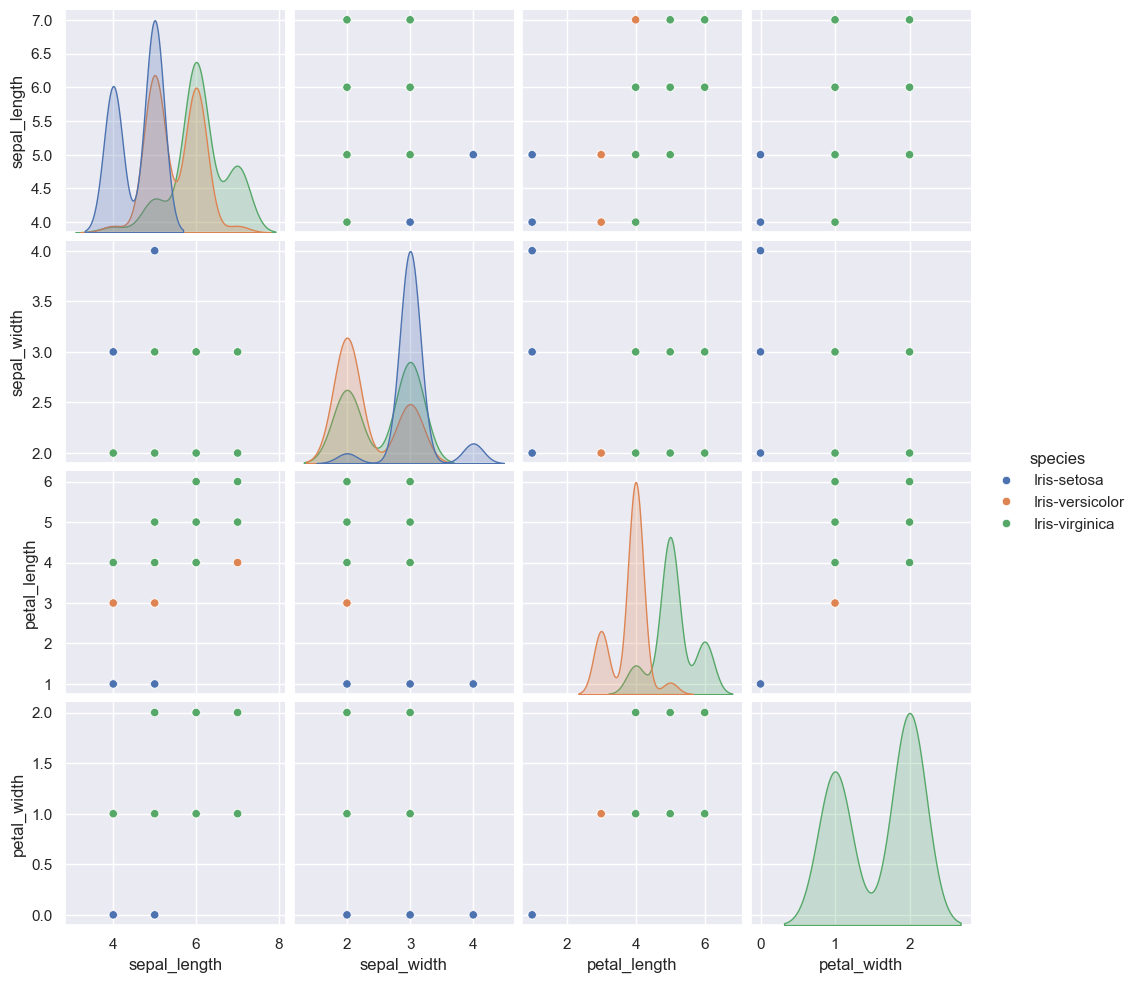

In [19]:
sns.pairplot(df_iris[['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']], hue = 'species')
plt.show()

In [21]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_iris.drop(['species', 'species_code'], axis=1)
y = df_iris.species

In [22]:
print(X.shape)
print(y.shape)

(149, 5)
(149,)


In [23]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(111, 5)
(38, 5)
(111,)
(38,)


[Text(0.6, 0.8333333333333334, 'x[0] <= 100.5\ngini = 0.666\nsamples = 111\nvalue = [34, 39, 38]'),
 Text(0.4, 0.5, 'x[4] <= 0.5\ngini = 0.498\nsamples = 73\nvalue = [34, 39, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 38\nvalue = [0, 0, 38]')]

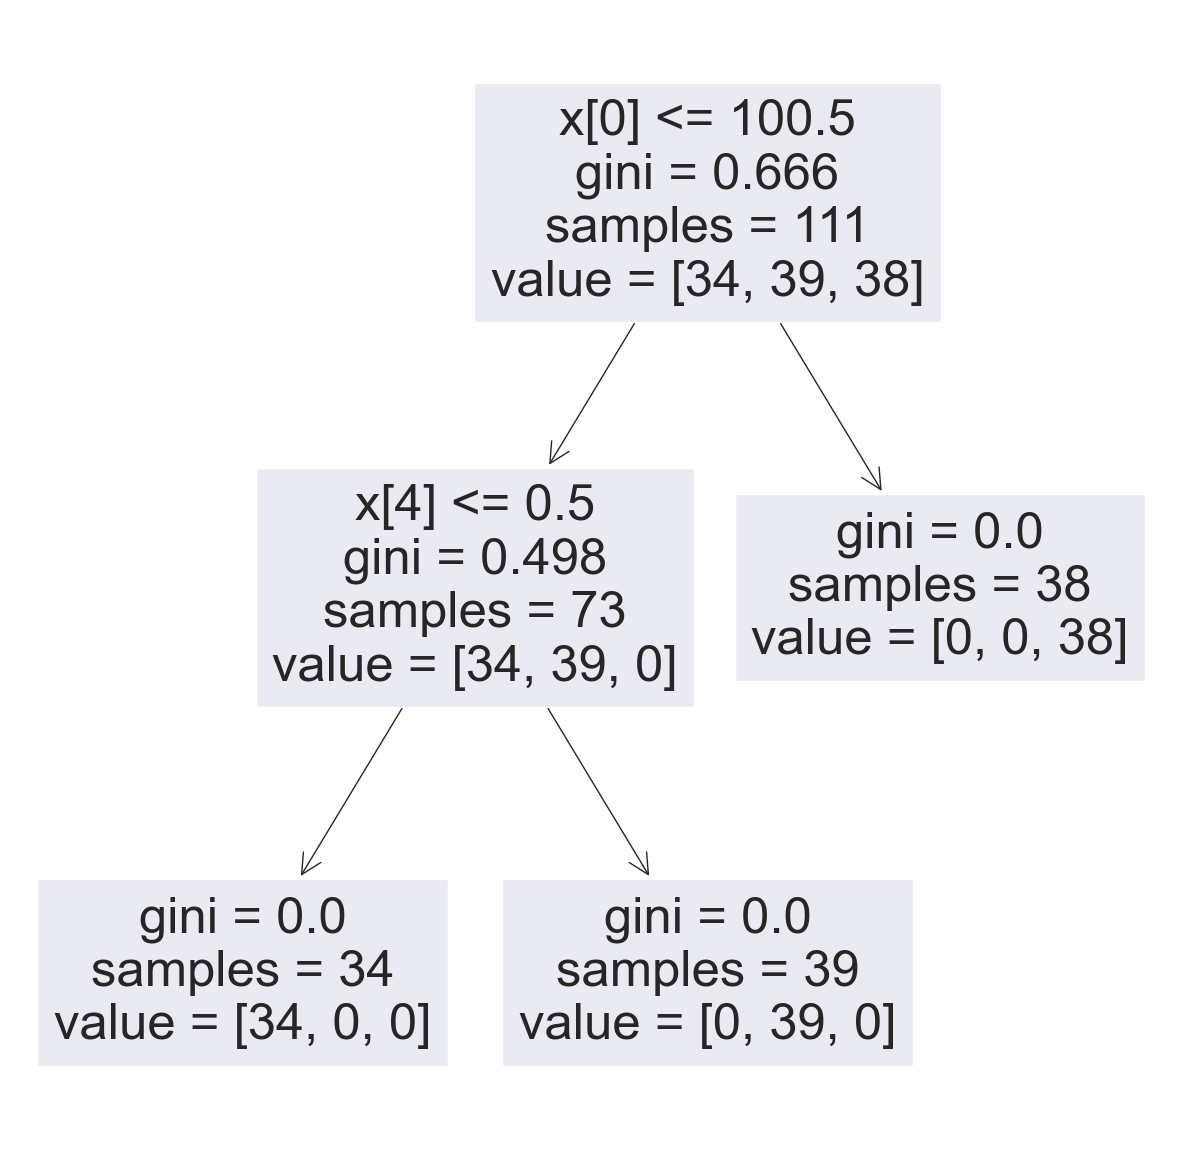

In [25]:
#Run Decision Tree classifier
iris_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
iris_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(iris_dt)

In [26]:
#What is the training accuracy score? Using the cross validation method
y_pred_train = iris_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(iris_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.990990990990991


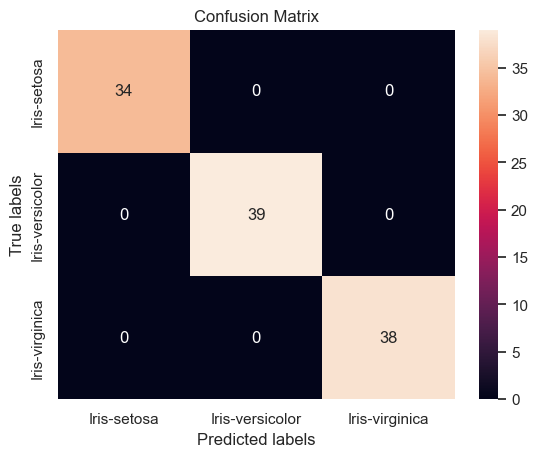

In [27]:
#Confusion matrix based on the last "k" in the sequence
labels = ['Iris-setosa','Iris-versicolor','Iris-virginica',]    

ax= plt.subplot()

cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [28]:
#What is the testing accuracy score? Using the cross validation method
y_pred = iris_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  1.0


array([[[23,  0],
        [ 0, 15]],

       [[27,  0],
        [ 0, 11]],

       [[26,  0],
        [ 0, 12]]], dtype=int64)

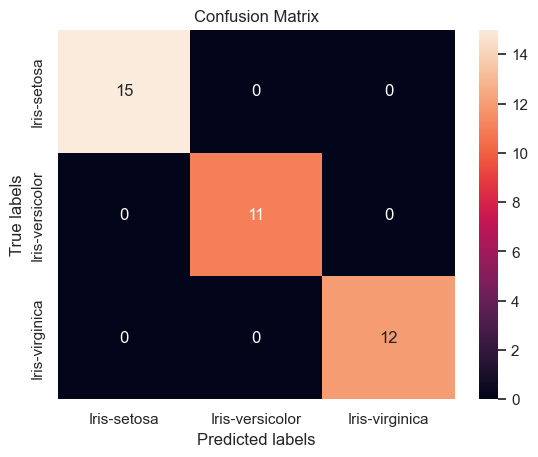

In [29]:
#Confusion matrix based on the last "k" in the sequence
labels = ['Iris-setosa','Iris-versicolor','Iris-virginica',]    

ax= plt.subplot()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [30]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

NameError: name 'StandardScaler' is not defined